This model is the classifier for the original datasets. Remember to check that you have filtering setting the way you want it :)

In [1]:
from scipy.io import loadmat
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymatreader import read_mat
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import eeg_funcs

In [2]:
# Preprocess and cut the BCI III data in to samples and form that in to a numpy array
# labels in a seperate array

# check the filepath!
# remember to change the filtering to True/False
filepath_3 = glob('GANs/data/Three/Train/*.mat')
d_array, d_labels = eeg_funcs.get_data_for_classifier_comp3(filepath_3, False, True, True)
print(d_array.shape)
print(d_labels.shape)

Creating RawArray with float64 data, n_channels=65, n_times=7794
    Range : 0 ... 7793 =      0.000 ...    32.471 secs
Ready.
Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
179 events found
Event IDs: [1 2]
Not setting metadata
179 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 179 events and 160 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
Creating RawArray with float64 data, n_channels=65, n_times=7794
    Range : 0 ... 7793 =      0.000 ...    32.471 secs
Ready.
Trigger channel has a non-zero initial value of 2 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
179 events found
Event IDs: [1 2]
Not setting metadata
179 matching events found
No baseline correction applied
0 projection items activated

Classifier Modeling

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
from zipfile import ZipFile
from sklearn.model_selection import train_test_split

In [4]:
# train and validation split for the data

X_train, X_val, y_train, y_val = train_test_split(d_array, d_labels, train_size=0.8)
print(X_train.shape)

(40571, 160, 8)


In [5]:
# classifier model 

model = keras.Sequential(
    [
        keras.Input(shape=X_train.shape[1:]),
        layers.BatchNormalization(),
        layers.Conv1D(16, kernel_size=1, strides=1, padding="same"),
        layers.Conv1D(16, kernel_size=20, strides=20, padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(128, activation="tanh"),
        layers.Dropout(0.2),
        layers.Dense(128, activation="tanh"),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 160, 8)           32        
 ormalization)                                                   
                                                                 
 conv1d (Conv1D)             (None, 160, 16)           144       
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 16)             5136      
                                                                 
 batch_normalization_1 (Batc  (None, 8, 16)            64        
 hNormalization)                                                 
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [6]:
#compile the model
# playing around with the optimizer parameters possible

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics="accuracy",
    )

In [7]:
#train the model
# playing around with the batch size and epochs possible

model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=65,
    validation_data=(X_val,y_val),
    shuffle=True
)

Epoch 1/65
634/634 [==============================] - 8s 7ms/step - loss: 0.6538 - accuracy: 0.6199 - val_loss: 0.6115 - val_accuracy: 0.6719
Epoch 2/65
634/634 [==============================] - 4s 6ms/step - loss: 0.6156 - accuracy: 0.6637 - val_loss: 0.5950 - val_accuracy: 0.6903
Epoch 3/65
634/634 [==============================] - 4s 7ms/step - loss: 0.6024 - accuracy: 0.6768 - val_loss: 0.5908 - val_accuracy: 0.6888
Epoch 4/65
634/634 [==============================] - 4s 7ms/step - loss: 0.5915 - accuracy: 0.6859 - val_loss: 0.5829 - val_accuracy: 0.6992
Epoch 5/65
634/634 [==============================] - 4s 7ms/step - loss: 0.5847 - accuracy: 0.6915 - val_loss: 0.5817 - val_accuracy: 0.7028
Epoch 6/65
634/634 [==============================] - 4s 7ms/step - loss: 0.5772 - accuracy: 0.6970 - val_loss: 0.5766 - val_accuracy: 0.7022
Epoch 7/65
634/634 [==============================] - 4s 6ms/step - loss: 0.5711 - accuracy: 0.7031 - val_loss: 0.5735 - val_accuracy: 0.7062
Epoch 

317/317 [==============================] - 1s 1ms/step
[[0.41092379 0.08202701]
 [0.00926748 0.49778172]]


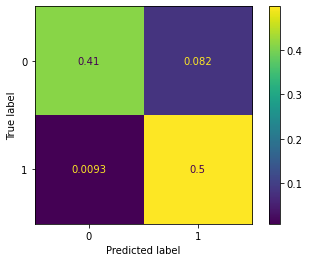

In [8]:
#putting the results of the latest training cycle in to a confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_prediction = model.predict(X_val)
y_prediction = y_prediction.flatten()
y_prediction = np.where(y_prediction > 0.5, 1, 0)

result = confusion_matrix(y_val, y_prediction, normalize='all')
print(result)
ConfusionMatrixDisplay(result).plot()

#change a correct file location!
plt.savefig("C:/Users/telab/Downloads/datafiles/pictures/CMatrix_Fil_Copies.png")

Evaluation of model on BCI 2 data

In [12]:
# Getting the BCI II competition data for final classification test
# remember to check filepath!
# remember to change the filtering to True/False
filepath_2 = glob('GANs/data/train/*.mat')
X_test, y_test = eeg_funcs.get_data_for_classifier_comp2(filepath_2, False, True, False)

Creating RawArray with float64 data, n_channels=65, n_times=26328
    Range : 0 ... 26327 =      0.000 ...   109.696 secs
Ready.
540 events found
Event IDs: [1 2]
Not setting metadata
540 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 540 events and 160 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
Creating RawArray with float64 data, n_channels=65, n_times=26328
    Range : 0 ... 26327 =      0.000 ...   109.696 secs
Ready.
540 events found
Event IDs: [1 2]
Not setting metadata
540 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 540 events and 160 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
Creating RawArray with float64 data, n_channels=65, n_times=35100
    Range : 0 ... 35099 =      0.000 ...   146.246 secs
Ready.
720 events found
Event IDs: [1 2]
Not setting met

In [13]:
#evaluation on the BCI II data

model.evaluate(
    x = X_test,
    y = y_test,
    batch_size = 64
)

119/119 [==============================] - 1s 5ms/step - loss: 0.7022 - accuracy: 0.7324


[0.7022292613983154, 0.7323980927467346]

237/237 [==============================] - 0s 2ms/step
[[0.68528322 0.14849127]
 [0.11911064 0.04711488]]


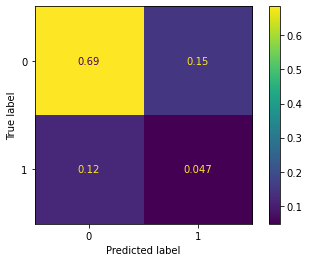

In [16]:
#Drawing confusion matrix from the BCI II test

t_prediction = model.predict(X_test)
t_prediction = t_prediction.flatten()
test_t = t_prediction.round(2)
t_prediction = np.where(t_prediction > 0.5, 1, 0)

result = confusion_matrix(y_test, t_prediction, normalize='all')
print(result)
ConfusionMatrixDisplay(result).plot()
plt.savefig("tempC.png")